In [1]:
import numpy as np
np.random.seed(1337)

import matplotlib.pyplot as plt

In [2]:
x, y, z = np.random.randn(3,10,2)
x.shape, y.shape, z.shape

((10, 2), (10, 2), (10, 2))

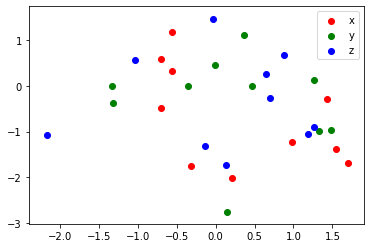

In [3]:
plt.scatter(*x.T, c="r", label="x")
plt.scatter(*y.T, c="g", label="y")
plt.scatter(*z.T, c="b", label="z")
plt.legend()

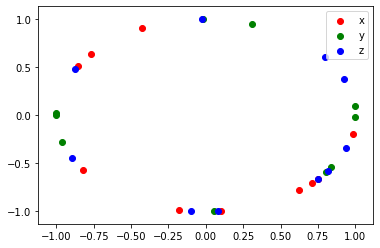

In [4]:
plt.scatter(*(x/np.linalg.norm(x,axis=1,keepdims=True)).T, c="r", label="x")
plt.scatter(*(y/np.linalg.norm(y,axis=1,keepdims=True)).T, c="g", label="y")
plt.scatter(*(z/np.linalg.norm(z,axis=1,keepdims=True)).T, c="b", label="z")
plt.legend()

In [5]:
def max_jaccard(x, y):
    """
    MaxPool-Jaccard similarity measure between two sentences
    :param x: list of word embeddings for the first sentence
    :param y: list of word embeddings for the second sentence
    :return: similarity score between the two sentences
    """
    m_x = np.max(x, axis=0)
    m_x = np.maximum(m_x, 0, m_x)
    m_y = np.max(y, axis=0)
    m_y = np.maximum(m_y, 0, m_y)
    m_inter = np.sum(np.minimum(m_x, m_y))
    m_union = np.sum(np.maximum(m_x, m_y))
    return m_inter / m_union


def fuzzify(s, u):
    """
    Sentence fuzzifier.
    Computes membership vector for the sentence S with respect to the
    universe U
    :param s: list of word embeddings for the sentence
    :param u: the universe matrix U with shape (K, d)
    :return: membership vectors for the sentence
    """
    f_s = np.dot(s, u.T)
    m_s = np.max(f_s, axis=0)
    m_s = np.maximum(m_s, 0, m_s)
    return m_s


def dynamax_jaccard(x, y):
    """
    DynaMax-Jaccard similarity measure between two sentences
    :param x: list of word embeddings for the first sentence
    :param y: list of word embeddings for the second sentence
    :return: similarity score between the two sentences
    """
    u = np.vstack((x, y))
    m_x = fuzzify(x, u)
    m_y = fuzzify(y, u)

    m_inter = np.sum(np.minimum(m_x, m_y))
    m_union = np.sum(np.maximum(m_x, m_y))
    return m_inter / m_union

In [6]:
max_jaccard(x, y), dynamax_jaccard(x, y)

(0.9001455369549659, 0.775813689032353)

In [7]:
max_jaccard(x, z), dynamax_jaccard(x, z)

(0.7740025677078315, 0.7195817365584792)

In [8]:
max_jaccard(z, y), dynamax_jaccard(z, y)

(0.8088584091546638, 0.721013709098666)

In [9]:
m_x = np.max(x, axis=0)
m_x

array([1.69851891, 1.18638337])

In [10]:
m_x = np.maximum(m_x, 0, m_x)
m_x

array([1.69851891, 1.18638337])

In [11]:
m_y = np.max(y, axis=0)
m_y

array([1.47827716, 1.11855474])

In [12]:
m_y = np.maximum(m_y, 0, m_y)
m_y

array([1.47827716, 1.11855474])

In [13]:
m_inter = np.sum(np.minimum(m_x, m_y))
m_inter

2.5968319052170674

In [14]:
m_union = np.sum(np.maximum(m_x, m_y))
m_union

2.8849022725832683

In [15]:
m_inter / m_union

0.9001455369549659

In [16]:
dynamax_jaccard(x, x)

1.0

In [17]:
dynamax_jaccard(x/np.linalg.norm(x,axis=1,keepdims=True), y/np.linalg.norm(y,axis=1,keepdims=True))

0.9325139524241827

In [18]:
u = np.vstack((x/np.linalg.norm(x,axis=1,keepdims=True), y/np.linalg.norm(y,axis=1,keepdims=True)))
u.shape

(20, 2)

In [19]:
f_s = np.dot(x/np.linalg.norm(x,axis=1,keepdims=True), u.T)
f_s.shape

(10, 20)

In [20]:
u_norm = np.linalg.norm(u, axis=1)
u_norm

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [21]:
np.argsort(u_norm)

array([ 1,  2,  5, 15, 18, 12, 11,  0, 17, 16, 14, 13,  9,  8,  7,  6,  4,
        3, 10, 19])

In [22]:
np.max(f_s, axis=0)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.85497812, 0.94676726, 0.95861348, 0.99881334, 0.86653839,
       0.98882317, 0.99628333, 0.9847139 , 0.72634306, 0.911956  ])

In [23]:
np.argmax(f_s, axis=0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 3, 0, 5, 2, 3, 4, 4, 5, 6, 6])

In [24]:
m_x = fuzzify(x, u)
m_x.shape

(20,)

In [25]:
m_y = fuzzify(y, u)
m_y.shape

(20,)

In [26]:
m_inter = np.sum(np.minimum(m_x, m_y))
m_inter

28.765317644579046

In [27]:
m_union = np.sum(np.maximum(m_x, m_y))
m_union

36.82648978425103

In [28]:
m_inter / m_union

0.7811039774114075

In [34]:
u = np.vstack((x, y))
u.shape

(20, 2)

In [35]:
f_s = np.dot(x, u.T)
f_s.shape

(10, 20)

In [39]:
m_s = np.max(f_s, axis=0)
m_s = np.maximum(m_s, 0, m_s)
m_s

array([1.24607241, 4.78539575, 5.56904544, 0.74031599, 4.94894448,
       2.89351938, 1.72068889, 5.74519209, 1.08308992, 3.72037387,
       1.76729437, 1.87241675, 1.94490848, 7.60489251, 0.47444512,
       4.13041887, 3.92463416, 0.81574113, 1.38586743, 0.55792405])

In [37]:
f_s = np.dot(u, u.T)
f_s.shape

(20, 20)

In [40]:
%timeit np.maximum(m_s, 0, m_s)

1.34 µs ± 10.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [44]:
%timeit np.clip(m_s, 0, None, m_s)

12.7 µs ± 352 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [47]:
%%timeit
f_s = np.dot(u, u.T)
np.split(f_s, [x.shape[0]])

7.3 µs ± 139 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [48]:
%%timeit
f_s = np.dot(x, u.T)
f_s = np.dot(y, u.T)

2.59 µs ± 29.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [31]:
m_x = np.max(f_s[:x.shape[0]], axis=0)
m_s = np.maximum(m_s, 0, m_s)
m_s

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])